In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division

from Definations import *
from Utilities import *
from sklearn.feature_selection.univariate_selection import SelectPercentile
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import isomap
import numpy as np
from scipy.sparse import hstack

# ASTD: Arabic Sentemental Tweet Dataset

1. It is Arabic Social sentimental analysis dataset
2. Consist of 10000 tweets gathered from twitter
3. Each tweet is Classified as: objective, subjective positive, subjective negative or subjective mixed 

## Dataset Exploration

### Text File

In [6]:
import codecs
filename = codecs.open('data\Tweets.txt', 'r', encoding="utf-8")
outputfile = filename.readlines()
for line in outputfile[0:5]:
    print(line)

بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان	OBJ

أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته	POS

البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف	NEG

#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة	OBJ

الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان	NEUTRAL



### CSV File

In [7]:
df = pd.read_csv('data\Tweets_x.csv', delimiter='\t',names= ["Tweet", "Classification"])

df.head()

,Tweet,Classification
0,﻿بعد استقالة رئيس #المحكمة_الدستورية ننتظر است...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL


In [8]:
df.describe()

,Tweet,Classification
count,10006,9986
unique,10002,4
top,يوسف الحسيني بالفيديو يفضح كذب قناة الجزيرة وي...,OBJ
freq,2,6675


AS it can be clearly seen, I lost some data in this process since i converted the txt into csv using excel. I removed them to keep dataset consistant but I will fix this issue later

## Show Count of All Categories

In [9]:
df = df.dropna()

In [10]:
df.describe()

,Tweet,Classification
count,9986,9986
unique,9982,4
top,الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...,OBJ
freq,2,6675


OBJ        6675
NEG        1682
NEUTRAL     831
POS         798
Name: Classification, dtype: int64


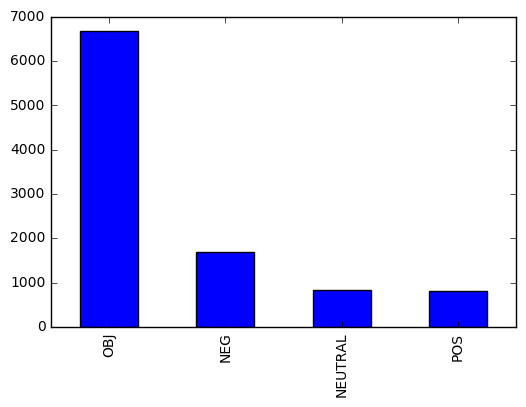

In [11]:
s2 = df.Classification
print(s2.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.value_counts().plot( kind="bar") 
plt.show()

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# y = np.random.rand(10,4)
# y[:,0]= np.arange(10)
# df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

# ax = df.plot(x="X", y="A", kind="bar")
# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

## Benchmark Model

Experments conducted is about applying wide range of standard classifiers on balanced and unbalanced data using token count with/without Tf-Idf to preprocess the dataset.

These Classifiers are:
    - Logistic Regression
    - Passive Aggresive
    - SVM
    - Perceptron
    - bnb
    - mnb
    - sgd
    - KNN

### ASTD paper Experiment

#### String Token Count:

It takes each sentence (all the words) present in the data set in the review section and then splits each of the words present in the form of tokens. The occurrence of these tokens in the whole data set are counted in such a way that the count of the occurrence of each token in a positive and negative feedback (in balanced dataset) or positive, negative and neutral (in unbalanced dataset) are collected separately. Finally, the word frequency of the tokens is calculated.
Tokens count is calculated by LinkedHashMap method. 


Tools: LinkedHashMap is it contains only the unique elements implemented using JAVA or OrderedDict in Python

code:  https://stackoverflow.com/questions/653887/equivalent-for-linkedhashmap-in-python

Ref: https://acadpubl.eu/hub/2018-119-12/articles/5/1211.pdf

#### Frequency–inverse document frequency(Tfidf):


It measures how important a word is to differentiate each category 

Code: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd 

Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf 

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])


    ####################################################################################

    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
#         print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################

        
        for clf in classifiers:

                    if clf['parameter_tunning']:
                        # region parameter tunning
#                         print("tuning: ", clf["name"])
                        clf['tune_clf'].fit(X_train, y_train)
#                         print (data['name'])
#                         print (feat_generator['name'])
#                         print (clf['tune_clf'].best_estimator_)
                        # endregion
                    else:
                        ####################################Training And Predict################################
                        pred = Train_And_Predict(X_train, y_train, X_test, clf['clf'], clf["name"])

                        (acc, tacc, support, f1 , df) = Evaluate_Result(pred, y_test)

                        score = dict(data=data['name'],
                                         feat_generator=feat_generator['name'],
                                         clf=clf['name'],
                                         # feat_ext=feat_ext['name'],
                                         f1=f1,
                                         acc=acc,
                                         tacc=tacc)
                        
                        df['Classifier'] =  clf["name"]
                        df['feauter_generator'] = feat_generator['name']
                        
                        dataframe_collection[clf["name"] + '-' + feat_generator['name'] ] = df
#                         print(clf["name"],df['feauter_generator'] )
                        scores.append(score)

    for key in dataframe_collection.keys():
        print("\n" +"="*40)
        print(key)
        print("-"*40)
        print(dataframe_collection[key])

        df_Classifiers = pd.DataFrame(classifiers)
        classifiers_collection[data['name']] = df_Classifiers

    #     print("-"*40)
    #     print(df_Classifiers.head())

        df_s = pd.DataFrame(scores)
        scores_collection[data['name']] = df_s
    #     print("-"*40)
    #     print(df_s.head())

    
# ####################################Testing##############################################
# print(60 * "=")
# for s in scores:
#     print("")
#     for k, v in s.iteritems():
#         print(k, v)


('Loading data:', '4-balanced')



C:\Users\Home\Anaconda2\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)



mnb-tfidf_ng3
----------------------------------------
     TP     FP    FN        L  Percision    Recall Classifier  \
0  60.0   68.0  99.0      NEG   0.468750  0.377358        mnb   
1  82.0  132.0  77.0  NEUTRAL   0.383178  0.515723        mnb   
2  89.0   72.0  70.0      OBJ   0.552795  0.559748        mnb   
3  77.0   56.0  82.0      POS   0.578947  0.484277        mnb   

  feauter_generator  
0         tfidf_ng3  
1         tfidf_ng3  
2         tfidf_ng3  
3         tfidf_ng3  

bnb-count_ng3
----------------------------------------
      TP     FP     FN        L  Percision    Recall Classifier  \
0   36.0   23.0  123.0      NEG   0.610169  0.226415        bnb   
1    6.0    5.0  153.0  NEUTRAL   0.545455  0.037736        bnb   
2   70.0   69.0   89.0      OBJ   0.503597  0.440252        bnb   
3  139.0  288.0   20.0      POS   0.325527  0.874214        bnb   

  feauter_generator  
0         count_ng3  
1         count_ng3  
2         count_ng3  
3         count_ng3  

bnb-c

## Experiments Settings

In [14]:
# for key in classifiers_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(classifiers_collection[key])

classifiers_collection['4-balanced']

,clf,name,parameter_tunning,tune_clf
0,"LogisticRegression(C=1, class_weight=None, dua...",Logistic Regression,False,"GridSearchCV(cv=3, error_score='raise',\n ..."
1,"PassiveAggressiveClassifier(C=1.0, class_weigh...",Passive Aggresive,False,NaN
2,"LinearSVC(C=1.0, class_weight=None, dual=False...",SVM,False,NaN
3,"Perceptron(alpha=0.0001, class_weight=None, et...",Perceptron,False,NaN
4,"BernoulliNB(alpha=1.0, binarize=0.5, class_pri...",bnb,False,NaN
5,"MultinomialNB(alpha=1.0, class_prior=None, fit...",mnb,False,NaN
6,"SGDClassifier(alpha=0.0001, average=False, cla...",sgd,False,NaN
7,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNN,False,"GridSearchCV(cv=5, error_score='raise',\n ..."


In [15]:
classifiers_collection['4-unbalanced']

,clf,name,parameter_tunning,tune_clf
0,"LogisticRegression(C=1, class_weight=None, dua...",Logistic Regression,False,"GridSearchCV(cv=3, error_score='raise',\n ..."
1,"PassiveAggressiveClassifier(C=1.0, class_weigh...",Passive Aggresive,False,NaN
2,"LinearSVC(C=1.0, class_weight=None, dual=False...",SVM,False,NaN
3,"Perceptron(alpha=0.0001, class_weight=None, et...",Perceptron,False,NaN
4,"BernoulliNB(alpha=1.0, binarize=0.5, class_pri...",bnb,False,NaN
5,"MultinomialNB(alpha=1.0, class_prior=None, fit...",mnb,False,NaN
6,"SGDClassifier(alpha=0.0001, average=False, cla...",sgd,False,NaN
7,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNN,False,"GridSearchCV(cv=5, error_score='raise',\n ..."


## Standard Classifiers Performance

In [16]:
# scores_collection['4-balanced']

### String Token Count Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [17]:
balanced_scores = scores_collection['4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
0,0.452830,Logistic Regression,4-balanced,0.448856,count_ng1,0.452830
1,0.424528,Passive Aggresive,4-balanced,0.421175,count_ng1,0.424528
2,0.430818,SVM,4-balanced,0.427266,count_ng1,0.430818
3,0.460692,Perceptron,4-balanced,0.458359,count_ng1,0.460692
4,0.466981,bnb,4-balanced,0.447112,count_ng1,0.466981
5,0.468553,mnb,4-balanced,0.471401,count_ng1,0.468553
6,0.451258,sgd,4-balanced,0.443845,count_ng1,0.451258
7,0.287736,KNN,4-balanced,0.260986,count_ng1,0.287736
8,0.444969,Logistic Regression,4-balanced,0.440431,count_ng2,0.444969
9,0.451258,Passive Aggresive,4-balanced,0.449239,count_ng2,0.451258


In [18]:
# for key in scores_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(scores_collection[key])
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
0,0.680840,Logistic Regression,4-unbalanced,0.620255,count_ng1,0.680840
1,0.649325,Passive Aggresive,4-unbalanced,0.618998,count_ng1,0.649325
2,0.651326,SVM,4-unbalanced,0.615437,count_ng1,0.651326
3,0.630815,Perceptron,4-unbalanced,0.610633,count_ng1,0.630815
4,0.669835,bnb,4-unbalanced,0.540016,count_ng1,0.669835
5,0.686343,mnb,4-unbalanced,0.604308,count_ng1,0.686343
6,0.664332,sgd,4-unbalanced,0.620908,count_ng1,0.664332
7,0.652826,KNN,4-unbalanced,0.547775,count_ng1,0.652826
8,0.693347,Logistic Regression,4-unbalanced,0.619747,count_ng2,0.693347
9,0.679340,Passive Aggresive,4-unbalanced,0.623975,count_ng2,0.679340


### Tf-Idf Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [19]:
balanced_scores = scores_collection['4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
24,0.452830,Logistic Regression,4-balanced,0.452670,tfidf_ng1,0.452830
25,0.454403,Passive Aggresive,4-balanced,0.454000,tfidf_ng1,0.454403
26,0.459119,SVM,4-balanced,0.459458,tfidf_ng1,0.459119
27,0.454403,Perceptron,4-balanced,0.455061,tfidf_ng1,0.454403
28,0.289308,bnb,4-balanced,0.184085,tfidf_ng1,0.289308
29,0.482704,mnb,4-balanced,0.485443,tfidf_ng1,0.482704
30,0.457547,sgd,4-balanced,0.456812,tfidf_ng1,0.457547
31,0.369497,KNN,4-balanced,0.368337,tfidf_ng1,0.369497
32,0.451258,Logistic Regression,4-balanced,0.450715,tfidf_ng2,0.451258
33,0.471698,Passive Aggresive,4-balanced,0.472762,tfidf_ng2,0.471698


In [20]:
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
24,0.679840,Logistic Regression,4-unbalanced,0.576546,tfidf_ng1,0.679840
25,0.636818,Passive Aggresive,4-unbalanced,0.612777,tfidf_ng1,0.636818
26,0.671336,SVM,4-unbalanced,0.627289,tfidf_ng1,0.671336
27,0.633317,Perceptron,4-unbalanced,0.608004,tfidf_ng1,0.633317
28,0.669335,bnb,4-unbalanced,0.536751,tfidf_ng1,0.669335
29,0.669335,mnb,4-unbalanced,0.536912,tfidf_ng1,0.669335
30,0.683842,sgd,4-unbalanced,0.620857,tfidf_ng1,0.683842
31,0.667334,KNN,4-unbalanced,0.607542,tfidf_ng1,0.667334
32,0.676338,Logistic Regression,4-unbalanced,0.561985,tfidf_ng2,0.676338
33,0.671836,Passive Aggresive,4-unbalanced,0.639038,tfidf_ng2,0.671836


In [21]:
Features_Generators.count()

TypeError: count() takes exactly one argument (0 given)